# German Credit Risk

## Este trabalho tem como objetivo classificar um cliente como um bom pagador ou não de um empréstimo, utilizando o algoritmo Random Forest


> O dataset foi extraído do Kaggle, e pode ser conferindo neste [link](https://www.kaggle.com/datasets/kabure/german-credit-data-with-risk).



### Bibliotecas

In [ ]:
!pip install category-encoders

In [ ]:
import pandas as pd
import category_encoders as ce
import seaborn as sns
sns.set()

### Passo 1) Leitura do dataset

Este dataset contém 11 colunas, sendo elas:


*   ID: Id do cliente
*   Age: idade do cliente
*   Sex: sexo do cliente (masculino ou feminino)
*   Job: 0 (não qualificado e não residente), 1 (não qualificado e residente), 2 (qualificado), 3 (altamente qualificado)
*   Housing: own (casa própria), rent (casa alugada), free ("grátis")
*   Saving accounts: little (pouco), moderate (moderado), quite rich (um pouco rico), rich (rico)
*   Checking account: little (pouco), moderate (moderado), quite rich (um pouco rico), rich (rico)
*   Credit amount: quantidade de crédito
*   Duration: duração do empréstimo (em meses)
*   Purpose: propósito do empréstimo
*   Risk: se o risco de fazer o empréstimo é bom (good) ou ruim (bad)













In [ ]:
df = pd.read_csv('german_credit_data.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Verificando as informações de cada coluna do dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


### Passo 2) Pré-processamento dos dados

#### 2.1) Retirando coluna `Unnamed: 0`

In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


#### 2.2) Retirando valores nulos

In [ ]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Como a coluna `Checking account` possui muitos valores nulos, ela será retirada da base de dados, e em seguida, os valores nulos restantes serão eliminados

In [ ]:
df = df.drop(columns=['Checking account'])
df = df.dropna()
df.shape

(817, 9)

#### 2.3) Codificando variáveis categóricas

Esse processo será aplicado às colunas `Sex`, `Housing`, `Saving accounts` e `Purpose` com o objetivo de transformar variáveis categóricas em variáveis numéricas

In [ ]:
encoder = ce.OrdinalEncoder(cols=['Sex', 'Housing', 'Saving accounts', 'Purpose'])
df = encoder.fit_transform(df)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
1,22,1,2,1,1,5951,48,1,bad
2,49,2,1,1,1,2096,12,2,good
3,45,2,2,2,1,7882,42,3,good
4,53,2,2,2,1,4870,24,4,bad
6,53,2,2,1,2,2835,24,3,good


Categorizando manualmente a variável target, onde 0 significa um risco ruim (bad) e 1 significa um risco bom (good)

In [ ]:
df['Risk'] = df['Risk'].apply(lambda x: 0 if x=='bad' else 1)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
1,22,1,2,1,1,5951,48,1,0
2,49,2,1,1,1,2096,12,2,1
3,45,2,2,2,1,7882,42,3,1
4,53,2,2,2,1,4870,24,4,0
6,53,2,2,1,2,2835,24,3,1


#### 2.4) Realizando o escalonamento das variáveis

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Risk'])
y = df['Risk']

scaler = StandardScaler()
scaler.fit(X)
X_escalonado = scaler.transform(X)
X_escalonado = pd.DataFrame(X_escalonado, columns=['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Credit amount', 'Duration', 'Purpose'])
X_escalonado.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose
0,-1.157477,-1.459544,0.161067,-0.598373,-0.541604,1.033697,2.324024,-1.285001
1,1.223202,0.685146,-1.369072,-0.598373,-0.541604,-0.378382,-0.717996,-0.674625
2,0.870509,0.685146,0.161067,0.678052,-0.541604,1.741019,1.817021,-0.064250
3,1.575895,0.685146,0.161067,0.678052,-0.541604,0.637729,0.296011,0.546125
4,1.575895,0.685146,0.161067,-0.598373,0.403888,-0.107688,0.296011,-0.064250


### Passo 3) Divisão dos dados de teste e treino

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_escalonado, y, test_size=0.3, random_state=33)

### Passo 4) Instanciando um algoritmo da classe RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=10)

### Passo 5) Treinando o modelo

In [ ]:
modelo.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

### Passo 6) Realizando predições

In [ ]:
y_prev = modelo.predict(X_test)

### Passo 7) Conferindo as métricas do modelo

#### 7.1) Acurácia

In [ ]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_test, y_prev)
print(f'Acurácia = {round(acuracia, 2)*100}%')

Acurácia = 63.0%


#### 7.2) Classification Report

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_prev))

              precision    recall  f1-score   support

           0       0.49      0.42      0.45        91
           1       0.69      0.75      0.72       155

    accuracy                           0.63       246
   macro avg       0.59      0.58      0.58       246
weighted avg       0.62      0.63      0.62       246



#### 7.3) Matriz de confusão

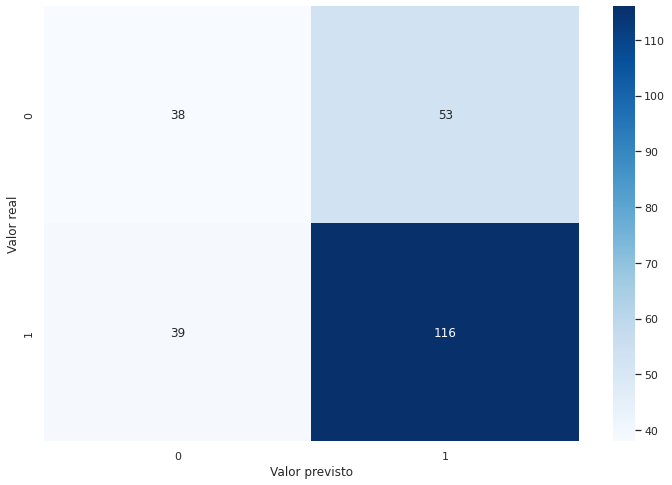

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.crosstab(y_test, y_prev, rownames=['Valor real'], colnames=['Valor previsto'])
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap="Blues");